In [36]:
import numpy
import scipy.stats
import scipy.optimize
import numpy
import plotly.express as px
import matplotlib.pyplot as plt


In [37]:
def getData(direction):
    sample_distribution_file = open(direction, "r")
    data = [float(data.replace(",", ".")) for data in sample_distribution_file.read().splitlines()]
    return data


In [38]:
path = "../continuous/data/data_normal.txt"
data = getData(path)


In [39]:
data_min, data_max = numpy.min(data), numpy.max(data)

N_MIN = 4  # Min number of bins (integer), must be > 1
N_MAX = 50  # Max number of bins (integer)

N = numpy.arange(N_MIN, N_MAX)  # number of bins
D = (data_max - data_min) / N  # Bin size vector
C = numpy.zeros(numpy.size(D))

# Computation of the cost function
for i in range(numpy.size(N)):
    edges = numpy.linspace(data_min, data_max, N[i] + 1)  # Bin edges
    ki = numpy.histogram(data, bins=edges)[0]  # Count number of events in bins
    k = numpy.mean(ki)  # Mean of event count
    v = numpy.sum((ki - k) ** 2) / N[i]  # Variance of event count
    C[i] = (2 * k - v) / ((D[i]) ** 2)  # Cost Function

# Optimal bin size Selection
cmin = numpy.min(C)
idx = numpy.argmin(C)
optD = D[idx]

N[idx]


20

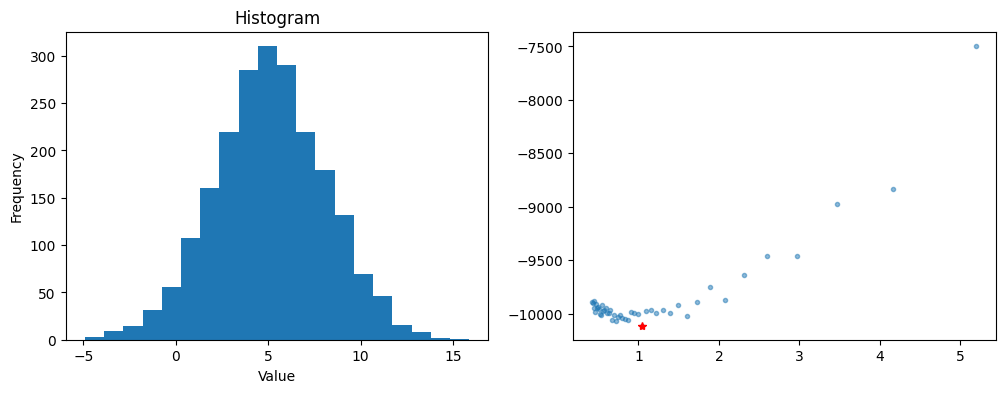

In [40]:
# Plotting
edges = numpy.linspace(data_min, data_max, N[idx] + 1)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(data, edges)
plt.title("Histogram")
plt.ylabel("Frequency")
plt.xlabel("Value")
# plt.savefig('Hist.png')

plt.subplot(122)
plt.plot(D, C, ".", alpha=0.5)
plt.plot(optD, cmin, "*r")
plt.show()


In [41]:
def shimazaki_shinimoto(data, n_min=2, n_max=100):
    data_min, data_max = numpy.min(data), numpy.max(data)
    N = numpy.arange(n_min, n_max)
    D = (data_max - data_min) / N
    C = numpy.zeros(numpy.size(D))  
    for i, d in enumerate(D):
        edges = numpy.linspace(data_min, data_max, N[i] + 1)
        ki = numpy.histogram(data, bins=edges)[0]
        k = numpy.mean(ki)
        v = numpy.sum((ki - k) ** 2) / N[i]
        C[i] = (2 * k - v) / (d**2)

    idx = numpy.argmin(C)
    optD = D[idx]
    optN = N[idx]
    return optD, optN


optimal_width, optimal_bins = shimazaki_shinimoto(data)
print(f"Ancho óptimo del bin: {optimal_width}")
print(f"Número óptimo de bins: {optimal_bins}")


Ancho óptimo del bin: 1.0399932725499998
Número óptimo de bins: 20
